# Model Evaluation

In this notebook, we are going to evaluate our model (plots, confusion matrix) and see if the results are sufficient to classify this dataset

In [ ]:
# Importing the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image,ImageOps
import glob

## Importing the model:



In [2]:
model = tf.keras.models.load_model("./fashion_mnist_conv.h5")

## Importing the training data

In [3]:
log_data = pd.read_csv('training.log', sep=',', engine='python')
log_data

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.841750,0.439222,NaN,NaN
1,1,0.893950,0.290296,NaN,NaN
2,2,0.907817,0.247940,NaN,NaN
3,3,0.919433,0.214381,NaN,NaN
4,4,0.930817,0.186531,NaN,NaN
5,5,0.939717,0.163124,NaN,NaN
6,6,0.947550,0.140764,NaN,NaN
7,7,0.952567,0.123484,NaN,NaN
8,8,0.959383,0.107825,NaN,NaN
9,9,0.964417,0.095364,NaN,NaN


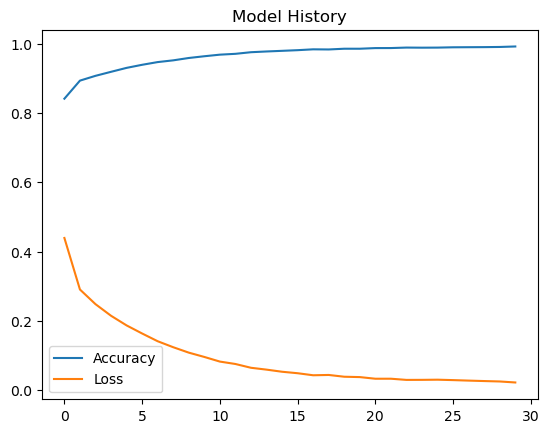

In [4]:
plt.plot(log_data["epoch"], log_data["accuracy"], label="Accuracy")
plt.plot(log_data["epoch"], log_data["loss"], label="Loss")
plt.title("Model History")
plt.legend();

We notice that the model's accuracy converges to 1 which is a good indication of its performance.

## Testing the model with real pictures

let's create a directory with real images to test our model

In [5]:
# First let's put the classes names:
classes = [
    "t-shirt",
    "trouser",
    "pullover",
    "dress",
    "coat",
    "sandal",
    "shirt",
    "sneaker",
    "bag",
    "ankle boot"
]

In [10]:
test_image = np.array(ImageOps.invert(Image.open("./test_tshirt.jpg.jpg").convert("L")))
test_image.shape

(28, 28)

In [18]:
def predict_images(directory = "test_images"):
    image_list = [Image.open(item) for i in [glob.glob('/test_images*.%s' % ext) for ext in ["jpg","gif","png","tga"]] for item in i]
    return image_list

In [23]:
for i in glob.glob("./test_images/*.jpg"):
    print(i)
[i for i in glob.glob("./test_images/*.")]

./test_images/Blue_Tshirt.jpg
./test_images/test_tshirt.jpg
./test_images/test_tshirt.jpg.jpg
